In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the data

df = pd.read_csv("/Users/ashleystevens/Desktop/anonymized_hubspot_deals.csv")


In [4]:
#Checking the data structure of the deals csv
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (593, 50)
Columns: ['Weighted amount', 'Deal Description', 'Cumulative time in "BANT Deal. Pain ID\'ed (Sales Pipeline)" (HH:mm:ss)', 'Cumulative time in "Opportunity (Sales Pipeline)" (HH:mm:ss)', 'Days to close', 'Deal Score', 'Close Date', 'Deal source attribution 2', 'Cumulative time in "In Trial - Trial in Progress (Sales Pipeline)" (HH:mm:ss)', 'Contract Start Date', 'Cumulative time in "Partner Referrals  (Sales Pipeline)" (HH:mm:ss)', 'Cumulative time in "Closed Lost (Sales Pipeline)" (HH:mm:ss)', 'Cumulative time in "Deep Dive. PSP Drafted (Sales Pipeline)" (HH:mm:ss)', 'Pipeline', 'Record ID', 'Forecast category', 'Original Traffic Source', 'Associated Company', 'Deal owner', 'Annual contract value', 'Is Closed (numeric)', 'Amount in company currency', 'Annual recurring revenue', 'Monthly recurring revenue', 'Deal probability', 'Associated Company (Primary)', 'Is Closed Won', 'Forecast probability', 'Contract End Date', 'Last Activity Date', 'Contract Term (Months)', '

,Weighted amount,Deal Description,"Cumulative time in ""BANT Deal. Pain ID'ed (Sales Pipeline)"" (HH:mm:ss)","Cumulative time in ""Opportunity (Sales Pipeline)"" (HH:mm:ss)",Days to close,Deal Score,Close Date,Deal source attribution 2,"Cumulative time in ""In Trial - Trial in Progress (Sales Pipeline)"" (HH:mm:ss)",Contract Start Date,...,"Cumulative time in ""Negotiation (Sales Pipeline)"" (HH:mm:ss)",Is Open (numeric),"Cumulative time in ""Renewals (Sales Pipeline)"" (HH:mm:ss)",Create Date,"Cumulative time in ""Contract Sent (Sales Pipeline)"" (HH:mm:ss)",Total contract value,Last Modified Date,"Cumulative time in ""Closed Won (Sales Pipeline)"" (HH:mm:ss)",Deal Stage,Deal Type
0,250.0,40-50 employees,NaN,NaN,69.0,33.0,2025-05-01 15:26,Event,NaN,NaN,...,NaN,1.0,NaN,2025-02-20 15:27,NaN,NaN,2025-02-20 16:28,NaN,Opportunity,New
1,0.0,"3,000 + Agents.",NaN,NaN,149.0,13.0,2025-07-20 09:06,Referral Partner,NaN,NaN,...,NaN,1.0,NaN,2025-02-20 08:07,NaN,NaN,2025-02-20 09:08,NaN,Partner Referrals,New
2,0.0,5-6k agents,NaN,NaN,149.0,13.0,2025-07-20 09:03,Referral Partner,NaN,NaN,...,NaN,1.0,NaN,2025-02-20 08:04,NaN,NaN,2025-02-20 09:05,NaN,Partner Referrals,New
3,0.0,Furthest Along - 300 agents,NaN,NaN,149.0,13.0,2025-07-20 08:55,Referral Partner,NaN,NaN,...,NaN,1.0,NaN,2025-02-20 07:58,NaN,NaN,2025-02-20 08:59,NaN,Partner Referrals,New
4,10000.0,BPO through partnership with AmplifAI,NaN,NaN,120.0,37.0,2025-06-20 15:01,Master Agent,NaN,NaN,...,NaN,1.0,NaN,2025-02-19 14:02,NaN,NaN,2025-02-19 15:03,NaN,Deep Dive. PSP Drafted,New


🔍 Columns with Missing Values:
                                                     Missing Count   Missing %
Forecast probability                                          593  100.000000
Annual recurring revenue                                      592   99.831366
Total contract value                                          592   99.831366
Annual contract value                                         592   99.831366
Monthly recurring revenue                                     592   99.831366
Cumulative time in "Closed Lost (Sales Pipeline...            590   99.494098
Cumulative time in "Closed Won (Sales Pipeline)...            580   97.807757
Cumulative time in "Closed Trial (Sales Pipelin...            577   97.301855
Cumulative time in "Opportunity (Sales Pipeline...            556   93.760540
Trial Start date                                              555   93.591906
Cumulative time in "Renewals  (Sales Pipeline)"...            554   93.423272
Trial End Date                  

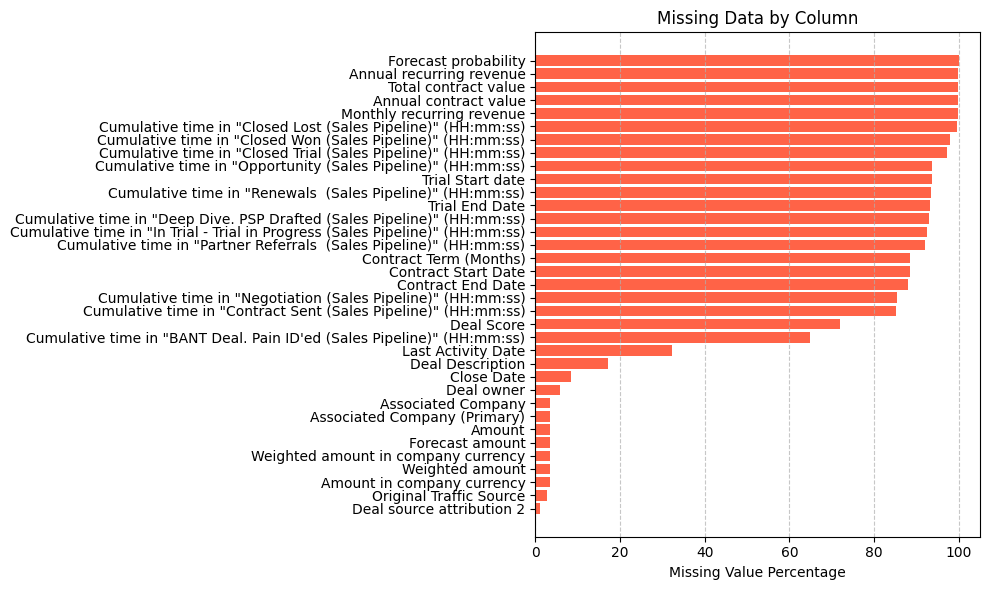

In [5]:
#Missing Value Analysis

missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]
print("🔍 Columns with Missing Values:\n", missing_df)

# Show by bucket
print("\n Missing Value Buckets:")
print("- No Missing:", df.columns[df.isnull().sum() == 0].tolist())
print("- Some Missing (<30%):", missing_df[missing_df['Missing %'] < 30].index.tolist())
print("- High Missing (≥30%):", missing_df[missing_df['Missing %'] >= 30].index.tolist())

# Bar chart of missing data
plt.figure(figsize=(10, 6))
plt.barh(missing_df.index, missing_df['Missing %'], color='tomato')
plt.xlabel("Missing Value Percentage")
plt.title("Missing Data by Column")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [6]:
#Summary statistics
print(df.describe())



       Weighted amount  Days to close  Deal Score     Record ID  \
count       573.000000     593.000000  167.000000  5.930000e+02   
mean      15801.403141     153.819562   17.275449  1.691690e+10   
std       56154.457588     134.044086   15.976513  6.945948e+09   
min           0.000000       0.000000    1.000000  9.756567e+09   
25%           0.000000      89.000000    7.000000  9.817334e+09   
50%           0.000000     128.000000   11.000000  1.581545e+10   
75%       10000.000000     167.000000   23.000000  1.997476e+10   
max      769500.000000    1045.000000   78.000000  3.377447e+10   

       Annual contract value  Is Closed (numeric)  Amount in company currency  \
count                    1.0           593.000000                  573.000000   
mean                     1.0             0.715008                40013.277487   
std                      NaN             0.451792                77441.027305   
min                      1.0             0.000000                    0.0

In [7]:
# Value counts for all categorical (object) columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts(dropna=False))


Unique values in 'Deal Description':
Deal Description
NaN                                                      102
.                                                         32
Renewal                                                   29
BPO                                                        8
BPO Program                                                5
                                                        ... 
AGENTS FOR CUSTOMER SERVICE CALL CENTER , short me...      1
Replacing CallSimulator / Asima - Onboarding is th...      1
Replacement of Zenearate for internal and external...      1
outbound sales call center in FL. 15 agents, hopin...      1
Create a new renewal term                                  1
Name: count, Length: 401, dtype: int64

Unique values in 'Cumulative time in "BANT Deal. Pain ID'ed (Sales Pipeline)" (HH:mm:ss)':
Cumulative time in "BANT Deal. Pain ID'ed (Sales Pipeline)" (HH:mm:ss)
NaN           384
00:00:03        1
337:30:56       1
4839:18:14      1


In [8]:
# Convert dates to datetime format
df['create_date'] = pd.to_datetime(df['Create Date'], errors='coerce')
df['close_date'] = pd.to_datetime(df['Close Date'], errors='coerce')
df['last_activity'] = pd.to_datetime(df['Last Activity Date'], errors='coerce')
df['last_modified'] = pd.to_datetime(df['Last Modified Date'], errors='coerce')

# Days to close (fallback if not provided)
if 'Days to close' not in df.columns and 'create_date' in df and 'close_date' in df:
    df['Days to close'] = (df['close_date'] - df['create_date']).dt.days

# Deal size category
if 'Amount' in df.columns:
    df['Deal_Size_Category'] = pd.cut(df['Amount'], 
                                      bins=[-np.inf, 1000, 10000, 50000, np.inf], 
                                      labels=['Small', 'Medium', 'Large', 'Enterprise'])

# Extract year, month, quarter
df['Create_Year'] = df['create_date'].dt.year
df['Create_Month'] = df['create_date'].dt.month
df['Create_Quarter'] = df['create_date'].dt.quarter
df['Close_Year'] = df['close_date'].dt.year
df['Close_Month'] = df['close_date'].dt.month
df['YearMonth'] = df['create_date'].dt.to_period('M')


In [9]:
# Fill missing categorical with 'Unknown'
for col in df.select_dtypes(include='object').columns:
    df[col].fillna('Unknown', inplace=True)

# Fill missing numeric values with median
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Optional: remove deals with zero or negative amount
if 'Amount' in df.columns:
    df = df[df['Amount'] > 0]

print("Cleaned data shape:", df.shape)

Cleaned data shape: (479, 61)


/var/folders/gq/n04dllr12q13h1k6rl_7c_sm0000gn/T/ipykernel_97917/1469934986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/var/folders/gq/n04dllr12q13h1k6rl_7c_sm0000gn/T/ipykernel_97917/1469934986.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [14]:
# Calculate overall win rate
win_rate = df['Is Closed Won'].sum() / (df['Is Closed Won'].sum() + df['Is closed lost'].sum()) * 100
# Win rate by Deal Type
win_rate_by_type = df.groupby('Deal Type').apply(
 lambda x: x['Is Closed Won'].sum() / (x['Is Closed Won'].sum() + x['Is closed lost'].sum()) * 100
)

print(win_rate)
print(win_rate_by_type)

36.675461741424805
Deal Type
Growth      46.808511
New         24.354244
PS         100.000000
Renewal     79.591837
dtype: float64


/var/folders/gq/n04dllr12q13h1k6rl_7c_sm0000gn/T/ipykernel_97917/2593945323.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate_by_type = df.groupby('Deal Type').apply(


In [15]:
# Average days in pipeline by stage
avg_days_by_stage = df.groupby('Deal Stage')['Days to close'].mean()
# Quarterly trend in sales cycle length
quarterly_trend = df.groupby('Create_Quarter')['Days to close'].mean()

print(avg_days_by_stage)
print(quarterly_trend)

Deal Stage
BANT Deal. Pain ID'ed           260.100000
Closed Lost                     144.541667
Closed Trial                    148.000000
Closed Won                      138.827338
Contract Sent                   188.100000
Deep Dive. PSP Drafted          292.846154
In Trial - Trial in Progress    228.333333
Negotiation                     230.000000
Opportunity                     145.096774
Partner Referrals               149.000000
Renewals                        337.785714
Name: Days to close, dtype: float64
Create_Quarter
1    191.097345
2    173.851852
3    153.642534
4    124.120879
Name: Days to close, dtype: float64


In [16]:
# Total revenue from won deals
total_revenue = df[df['Is Closed Won'] == True]['Amount'].sum()
# Average deal size by Deal Type
avg_deal_size = df.groupby('Deal Type')['Amount'].mean()

print(total_revenue)
print(avg_deal_size)

6086444.0
Deal Type
Growth     62142.571429
New        43206.289855
PS          8246.153846
Renewal    75603.907692
Name: Amount, dtype: float64
